In [147]:
import pandas as pd
import matplotlib.pyplot as plt

In [148]:
laptop = pd.read_csv('data/laptop_price.csv', encoding= 'latin-1')

In [149]:
laptop = laptop.drop(columns= 'laptop_ID')

In [5]:
laptop.isna().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [150]:
laptop['Weight'] = laptop['Weight'].str.split('k').str[0].astype(float)

In [151]:
laptop['Ram'] = laptop['Ram'].str.split('G').str[0].astype(float)

In [152]:
laptop['Memory'] = laptop['Memory'].str.replace('T','024G').str.split('G').str[0].astype(float)

In [9]:
laptop['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [10]:
laptop['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

In [11]:
laptop['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [12]:
laptop['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [13]:
# 노트북이 가벼운 순으로 정렬
laptop.sort_values('Weight', ascending= True)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1082,Lenovo,Yoga Book,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4.0,64.0,Intel HD Graphics 400,Windows 10,0.69,646.27
50,Lenovo,Yoga Book,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4.0,64.0,Intel HD Graphics 400,Android,0.69,319.00
1126,Lenovo,Yoga Book,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4.0,64.0,Intel HD Graphics 400,Windows 10,0.69,479.00
1114,Lenovo,Yoga Book,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4.0,64.0,Intel HD Graphics 400,Android,0.69,549.00
746,Samsung,Notebook 9,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16.0,256.0,Intel HD Graphics 620,Windows 10,0.81,1649.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1116,Lenovo,IdeaPad Y900-17ISK,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,16.0,256.0,Nvidia GeForce GTX 980M,Windows 10,4.60,2749.99
1081,Lenovo,IdeaPad Y900-17ISK,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,32.0,512.0,Nvidia GeForce GTX 980M,Windows 10,4.60,3240.00
577,Lenovo,IdeaPad Y910-17ISK,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,32.0,256.0,Nvidia GeForce GTX 1070,Windows 10,4.60,2663.00
1048,Lenovo,IdeaPad Y900-17ISK,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16.0,128.0,Nvidia GeForce GTX 980M,Windows 10,4.60,2289.99


In [13]:
laptop['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [14]:
laptop.groupby('Company')['Weight'].mean().sort_values(ascending= True).to_frame()

,Weight
Company,
LG,1.050000
Huawei,1.050000
Google,1.100000
Microsoft,1.251333
Samsung,1.315556
Apple,1.320476
Vero,1.330000
Mediacom,1.337143
Xiaomi,1.620000


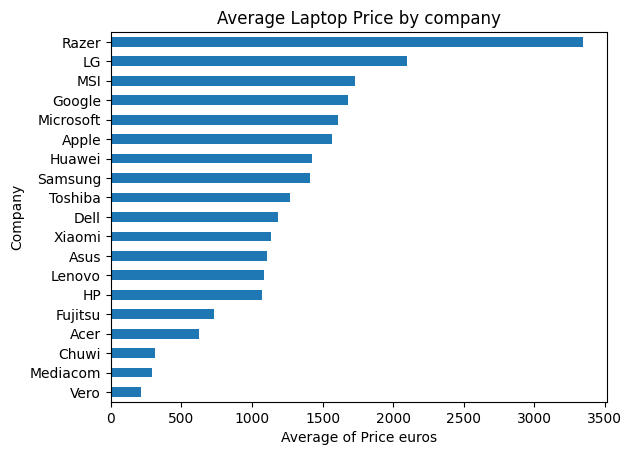

In [14]:
# 노트북 평균 값을 바차트로 나타냄
laptop.groupby('Company')['Price_euros'].mean().sort_values().plot(kind= 'barh')
plt.title('Average Laptop Price by company')
plt.xlabel('Average of Price euros')
plt.show()

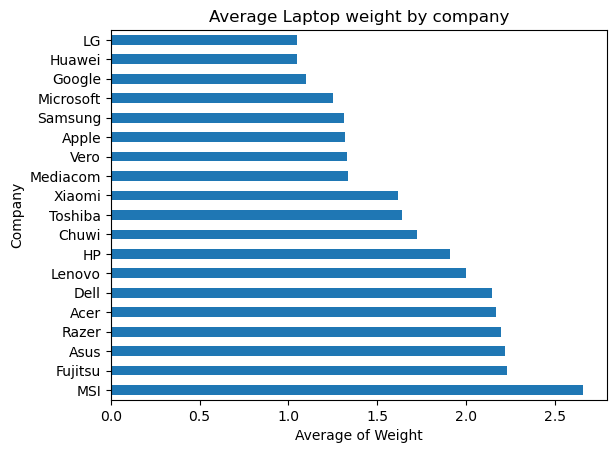

In [16]:
# 회사별 노트북 평균 무게를 바차트로 나타냄
laptop.groupby('Company')['Weight'].mean().sort_values(ascending= False).plot(kind= 'barh')
plt.title('Average Laptop weight by company')
plt.xlabel('Average of Weight')
plt.show()

In [17]:
laptop[['Weight', 'Price_euros']].describe()

,Weight,Price_euros
count,1303.000000,1303.000000
mean,2.038734,1123.686992
std,0.665475,699.009043
min,0.690000,174.000000
25%,1.500000,599.000000
50%,2.040000,977.000000
75%,2.300000,1487.880000
max,4.700000,6099.000000


In [15]:
# 가장 비싼 컴퓨터?
laptop[laptop['Price_euros'] == laptop['Price_euros'].max()]

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
196,Razer,Blade Pro,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32.0,1024.0,Nvidia GeForce GTX 1080,Windows 10,3.49,6099.0


In [16]:
# 가장 저렴한 컴퓨터
laptop[laptop['Price_euros'] == laptop['Price_euros'].min()]

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1215,Acer,C740-C9QX (3205U/2GB/32GB/Chrome,Netbook,11.6,1366x768,Intel Celeron Dual Core 3205U 1.5GHz,2.0,32.0,Intel HD Graphics,Chrome OS,1.3,174.0


In [17]:
# 가장 무게가 가벼운 컴퓨터
laptop[laptop['Weight'] == laptop['Weight'].min()]

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
50,Lenovo,Yoga Book,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4.0,64.0,Intel HD Graphics 400,Android,0.69,319.00
1082,Lenovo,Yoga Book,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4.0,64.0,Intel HD Graphics 400,Windows 10,0.69,646.27
1114,Lenovo,Yoga Book,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4.0,64.0,Intel HD Graphics 400,Android,0.69,549.00
1126,Lenovo,Yoga Book,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4.0,64.0,Intel HD Graphics 400,Windows 10,0.69,479.00


In [18]:
# 가장 무게가 무거운 컴퓨터
laptop[laptop['Weight'] == laptop['Weight'].max()]

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
238,Asus,ROG G703VI-E5062T,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7820HK 2.9GHz,32.0,512.0,Nvidia GeForce GTX 1080,Windows 10,4.7,3890.0


In [22]:
laptop['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [23]:
# apple 의 제품을 보여줌

In [24]:
apple = laptop[laptop['Company'] == 'Apple']

In [25]:
# 선택한 제품의 inches 선택하면 그 인치의 노트북을 보여줌

In [26]:
inches = apple[apple['Inches'] == 12]

In [27]:
# 선택한 제품의 cpu 를 선택한 그 cpu 의 노트북을 보여줌
inches

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
14,Apple,"MacBook 12""",Ultrabook,12.0,IPS Panel Retina Display 2304x1440,Intel Core M m3 1.2GHz,8.0,256.0,Intel HD Graphics 615,macOS,0.92,1262.4
81,Apple,"MacBook 12""",Ultrabook,12.0,IPS Panel Retina Display 2304x1440,Intel Core i5 1.3GHz,8.0,512.0,Intel HD Graphics 615,macOS,0.92,1510.0
794,Apple,"MacBook 12""",Ultrabook,12.0,IPS Panel Retina Display 2304x1440,Intel Core M 1.2GHz,8.0,512.0,Intel HD Graphics 5300,Mac OS X,0.92,1165.0
1069,Apple,"MacBook 12""",Ultrabook,12.0,IPS Panel Retina Display 2304x1440,Intel Core M 1.1GHz,8.0,256.0,Intel HD Graphics 515,Mac OS X,0.92,1300.0
1193,Apple,"MacBook 12""",Ultrabook,12.0,IPS Panel Retina Display 2304x1440,Intel Core M 1.1GHz,8.0,256.0,Intel HD Graphics 5300,Mac OS X,0.92,1163.0
1210,Apple,"MacBook 12""",Ultrabook,12.0,IPS Panel Retina Display 2304x1440,Intel Core M 1.2GHz,8.0,512.0,Intel HD Graphics 515,Mac OS X,0.92,1279.0


In [28]:
laptop['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [29]:
laptop[['Inches', 'Ram','Weight','Inches','Price_euros']].corr()

,Inches,Ram,Weight,Inches,Price_euros
Inches,1.000000,0.237993,0.827631,1.000000,0.068197
Ram,0.237993,1.000000,0.383874,0.237993,0.743007
Weight,0.827631,0.383874,1.000000,0.827631,0.210370
Inches,1.000000,0.237993,0.827631,1.000000,0.068197
Price_euros,0.068197,0.743007,0.210370,0.068197,1.000000


In [51]:
type_choice_frame = laptop[laptop['TypeName'] == 'Ultrabook']

In [61]:
type_choice['Inches'].unique().astype(str)

array(['13.3', '15.4', '14.0', '12.0', '15.6', '13.5', '12.5', '13.0',
       '12.3', '15.0', '11.6'], dtype='<U32')

In [62]:
inches_choice = type_choice[type_choice_frame['Inches'] == 13.3]

In [82]:
inches_choice['Ram'].sort_values().unique()

array([ 4.,  8., 16., 32.])

In [87]:
ram_choice = inches_choice[inches_choice['Ram'] == 8]

In [91]:
ram_choice['Memory'].sort_values().unique()

array([128., 256., 512.])

In [94]:
weight_choice = ram_choice[ram_choice['Memory'] == 128]

In [97]:
weight_choice['Weight'].sort_values().unique()

array([1.21, 1.22, 1.29, 1.34, 1.35, 1.37])

In [99]:
weight_choice[weight_choice['Weight'] == 1.21]

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
565,Dell,XPS 13,Ultrabook,13.3,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i5 8250U 1.6GHz,8.0,128.0,Intel UHD Graphics 620,Windows 10,1.21,1599.0


In [103]:
ram_choice['Memory'].sort_values().unique()

array([128., 256., 512.])

In [139]:
data = laptop.groupby('Inches')['Price_euros'].mean().to_frame().reset_index()

In [138]:
import seaborn as sb

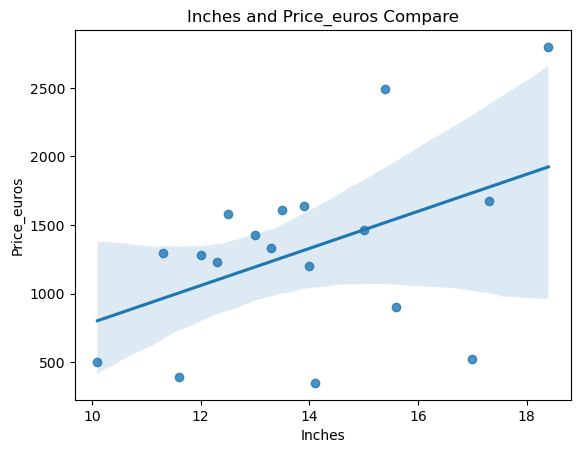

In [150]:
sb.regplot(data, x= 'Inches', y= 'Price_euros')
plt.title('Inches and Price_euros Compare')
plt.show()

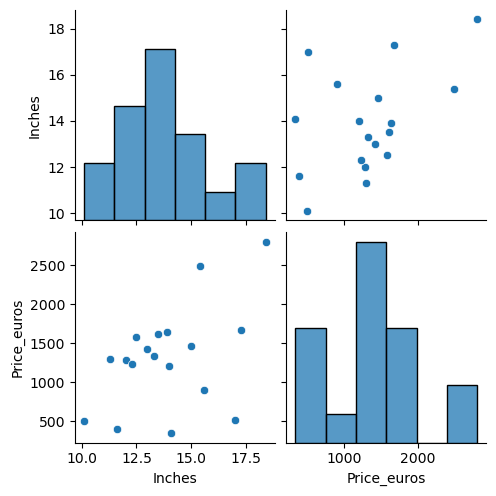

In [157]:
sb.pairplot(data, vars=['Inches', 'Price_euros'])
plt.show()

In [18]:
laptop['Ram'].sort_values(ascending= True).unique()

array(['12GB', '16GB', '24GB', '2GB', '32GB', '4GB', '64GB', '6GB', '8GB'],
      dtype=object)

In [20]:
laptop['Ram'].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [20]:
laptop.head(2)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128.0,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128.0,Intel HD Graphics 6000,macOS,1.34,898.94


In [117]:
X = laptop[['TypeName','Inches','Cpu','Ram','Memory','Weight']]

In [118]:
y=laptop['Price_euros']

In [73]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [119]:
ct = ColumnTransformer([('encoder', OneHotEncoder(), [0,2])], remainder= 'passthrough')

In [120]:
X = ct.fit_transform(X)

In [121]:
X

<1303x128 sparse matrix of type '<class 'numpy.float64'>'
	with 7818 stored elements in Compressed Sparse Row format>

In [122]:
y

0       1339.69
1        898.94
2        575.00
3       2537.45
4       1803.60
         ...   
1298     638.00
1299    1499.00
1300     229.00
1301     764.00
1302     369.00
Name: Price_euros, Length: 1303, dtype: float64

In [123]:
# 인공지능에 학습
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 1)

In [124]:
from sklearn.linear_model import LinearRegression

In [125]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [126]:
y_pred = regressor.predict(X_test)

In [127]:
y_test 

644      450.00
1275     729.00
163     1079.00
1008    1049.26
909     1899.00
         ...   
1112     429.00
893     1799.00
493      579.00
1245    1600.00
62       599.00
Name: Price_euros, Length: 261, dtype: float64

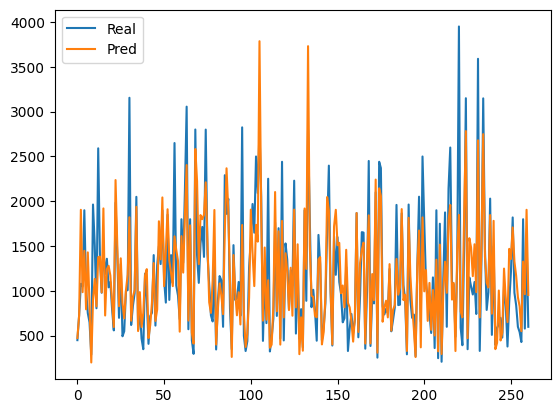

In [128]:
plt.plot(y_test.values)
plt.plot(y_pred)
plt.legend(['Real','Pred'])
plt.savefig
plt.show()

In [129]:
laptop.head(2)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128.0,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128.0,Intel HD Graphics 6000,macOS,1.34,898.94


In [87]:
# 새로운 데이터 
# 'TypeName' = Ultrabook,
# 'Inches'= 15.3,
# 'Cpu' : Intel Core i5 2.3GHz	
# 'Ram': 32 ,
# 'Memory':128,
# 'Weight' : 2.5

In [102]:
import numpy as np

In [139]:
new_data = np.array(['Ultrabook',15.3,'Intel Core i5 2.3GHz' ,32, 128, 2.5])

In [140]:
new_data.shape

(6,)

In [141]:
new_data = new_data.reshape(1,6)

In [142]:
new_data = ct.transform(new_data)

c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\compose\_column_transformer.py:779: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  check_array(X, accept_sparse=True, force_all_finite=False)


In [143]:
new_data_pred = regressor.predict(new_data)

In [144]:
new_data_pred[0]

2764.9339250875

In [145]:
import joblib

In [146]:
joblib.dump(regressor, 'regressor.pkl')
joblib.dump(ct, 'ct.pkl')

['ct.pkl']

In [154]:
laptop.to_csv('float_laptop.csv')